# Importing Libraries and Importing the dataset

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler


df = pd.read_csv("hourlywagedata.csv", encoding='utf-8-sig')
df.head()

,position,agerange,yrsscale,hourwage
0,1,1,2,13.736234054538
1,0,1,2,16.4407309689108
2,0,1,3,21.3891077239505
3,1,1,1,11.377187468408
4,0,1,3,21.5607775454338


# Data Cleansing

I want to look at the number of rows and columns of the dataframe

In [2]:
df.shape

(3000, 4)

Now I want to look at the number of null values across all columns

In [3]:
df.isnull().sum()

position    0
agerange    0
yrsscale    0
hourwage    0
dtype: int64

Now I want to look at the data types across all columns

In [4]:
df.dtypes

position     int64
agerange     int64
yrsscale     int64
hourwage    object
dtype: object

From the above we can clearly see the hourwage column is an object which needs converting to a float so we can analyse later. 

Now I want to investigate this further

In [12]:
df[df.hourwage == ' '].count()


position    89
agerange    89
yrsscale    89
hourwage    89
dtype: int64

It appears there are 89 blanks in the hourwage column which I intend to drop 

In [13]:
df = df[df.hourwage != ' ']

In [14]:
df.astype(float)

,position,agerange,yrsscale,hourwage
0,1.0,1.0,2.0,13.736234
1,0.0,1.0,2.0,16.440731
2,0.0,1.0,3.0,21.389108
3,1.0,1.0,1.0,11.377187
4,0.0,1.0,3.0,21.560778
...,...,...,...,...
2995,0.0,3.0,4.0,20.419885
2996,0.0,3.0,4.0,20.441482
2997,1.0,3.0,4.0,18.450234
2998,0.0,3.0,4.0,19.144460


In [20]:
df["hourwage"] = df.hourwage.astype(float)

In [21]:
df.dtypes


position      int64
agerange      int64
yrsscale      int64
hourwage    float64
dtype: object

Lets create a pair plot to compare the distribute of hour wage gainst the three categorial indepent variables

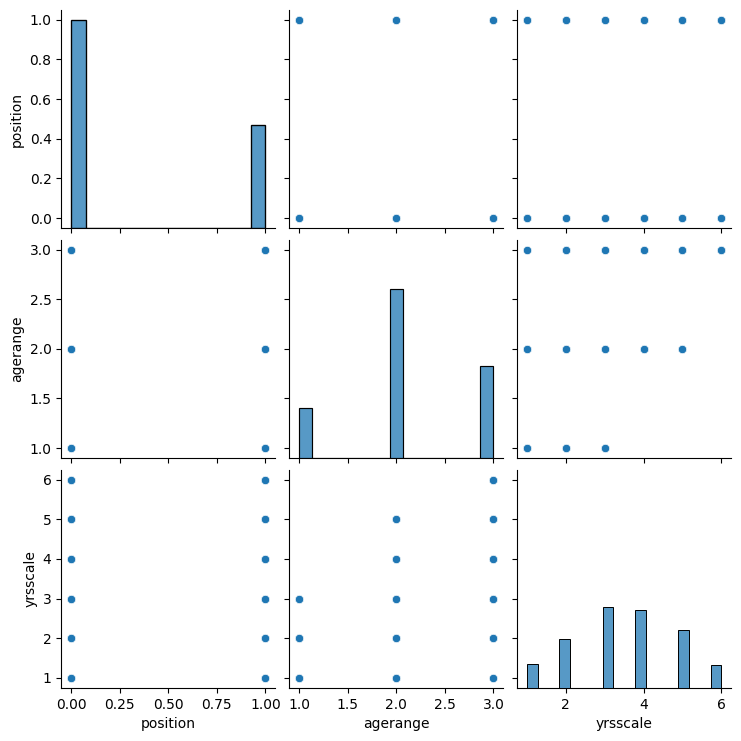

In [30]:
sns.pairplot(data=df.drop('hourwage', axis=1))

# Multiple Linear Regression

Create an X = iloc for the position, agerange, yrsscale columns
Print out the array for the 3 columns

In [33]:
X = df.iloc[:,[0, 1, 2]].values
X[1:4]

array([[0, 1, 2],
       [0, 1, 3],
       [1, 1, 1]], dtype=int64)

Create an empty linear regression model like below and give it a good variable name such as hourwage_model.

Create the model we use fit(x,y)

Print the Intercept points of the hour wage model
Print the Co efficient points of the hour wage model

In [35]:
y = df.iloc[:,3].values
y = y.reshape(-1, 1)
X = X.reshape(-1, X.shape[1])

hourwage_model = LinearRegression()

hourwage_model.fit(X,y)


print('Intercept: \n', hourwage_model.intercept_)
print('Coefficients: \n', hourwage_model.coef_)

Intercept: 
 [18.26163096]
Coefficients: 
 [[-2.0197037  -0.22575442  0.82398308]]


The above shows the Intercept point of 18.26 for the hourwage model

The above shows the Co efficient points of the hourwage model for the 3 columns of position, agerange, yrsscale.

# Training and test sets

From sklearn library import train_test split

Create X train and X test, y train and y test. Split this 80% training - 20% test.

In [36]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20)

print ("Training data:",X_train.shape, y_train.shape)
print ("Test data:",X_test.shape, y_test.shape)

Training data: (2328, 3) (2328, 1)
Test data: (583, 3) (583, 1)


The above uses a 0.20 test size split our data of 2911 items into a training set of 2328 observations and 3 columns, and a test set of 583 observations in 3 columns.

We can now use this to evaluate our hourwage_model

# Feature Scaling

Let's Normalize our data using MinMaxScaler. Note that we fit it on the training set - we don't want to fit anything on the test set.

Fit the scaler on train data

In [37]:
sc = MinMaxScaler()
sc.fit(X_train)

MinMaxScaler()

Apply the scaler on train and test data

In [38]:
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

# Fit the model on the training data

First we fit the model

In [39]:
lm= LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

In [40]:
y_test.shape

(583, 1)

Create line coordinates

In [41]:
X_line = np.empty(X_test.shape)
for i in range(X_test.shape[1]):
    X_line[:, i] = np.linspace(np.min(X_test[:,i]), np.max(X_test[:,i]), num=X_test.shape[0])
y_line = lm.predict(X_line)

print('Intercept: \n', lm.intercept_)
print('Coefficients: \n', lm.coef_)

Intercept: 
 [18.76875073]
Coefficients: 
 [[-2.01767992 -0.47896028  4.2653437 ]]


The above shows the Intercept point of 18.76 for the Linear Regression model

The above shows the Co efficient points of the Linear Regression model for the 3 columns of position, agerange, yrsscale.

In [48]:
predictions[0:5]

array([[18.52927059],
       [19.68438548],
       [22.55513414],
       [19.68438548],
       [19.07079689]])

# Plot the errors creating an error bar

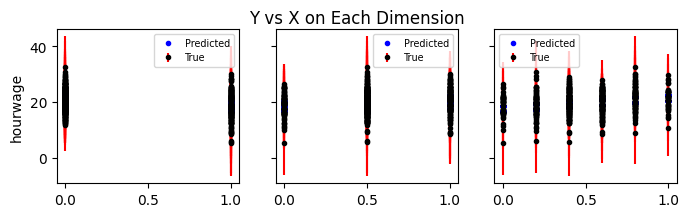

In [49]:
## Plot the errors
fig, ax = plt.subplots(1, X_test.shape[1], sharey=True, sharex=True, figsize=(8,2))
fig.suptitle("Y vs X on Each Dimension")
ax[0].set_ylabel(df.columns[3])

# Plot Line of Best Fit
# for i in range(X_test.shape[1]):
#     ax[i].plot(X_line[:,i], y_line[:,0])
#     ax[i].set_xlabel(data.columns[i])

# Get values for the error bar
error_bar_values = np.abs((y_test-predictions)[:,0])

# Plot error bars (should be no error)
for i in range(X_test.shape[1]):
    ax[i].errorbar(X_test[:, i], y_test[:, 0], yerr=error_bar_values, fmt='.k', ecolor='red', label='True')
    ax[i].scatter(X_test[:,i], predictions[:,0], c='b', marker='.', label='Predicted')
    ax[i].legend(loc='best', fontsize='x-small')

The red lines indicate the error of the prediction from the actual observations. The black dots represent true values, and the blue dots represent predicted values. You will notice that, at the end of the red lines, either at the top or bottom, is a blue dot. In other words, you can read the red error line as the distance deviated from the true values. The reason why there is a red line either side of the black dot is to show that the error may be within that line, either above or below.

# Sklearn's LinearRegression provides the R squared score for its models:

In [50]:
print ("Score:", model.score(X_test, y_test))

Score: 0.09932649643513192


This score is 0.0993 which is not close to 1, which suggests that our model does not fit our observations.